In [98]:
%matplotlib notebook
import pandas as pd
import numpy as np
import FuntionUtils as cf


import matplotlib
import seaborn
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [99]:
df = pd.read_csv("TempData.csv")


In [100]:
df

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


In [101]:
# ------Data preparation -----
# change the type of timestamp column for plotting
df['timestamp'] = pd.to_datetime(df['timestamp'])
# change fahrenheit to °C (temperature mean= 71 -> fahrenheit)
df['value'] = (df['value'] - 32) * 5/9
# plot the data
#df.plot(x='timestamp', y='value')
# the hours and if it's night or day (7:00-22:00)
df['hours'] = df['timestamp'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df['DayOfTheWeek'] = df['timestamp'].dt.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)
# An estimation of anomly population of the dataset (necessary for several algorithm)
outliers_fraction = 0.01
# time with int to plot easily
df['time_epoch'] = (df['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

In [102]:
df

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,time_epoch
0,2013-07-04 00:00:00,21.044908,0,0,3,1,13728960
1,2013-07-04 01:00:00,21.789015,1,0,3,1,13728996
2,2013-07-04 02:00:00,21.598781,2,0,3,1,13729032
3,2013-07-04 03:00:00,20.533000,3,0,3,1,13729068
4,2013-07-04 04:00:00,20.713084,4,0,3,1,13729104
...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,22.427892,11,1,2,1,14012748
7263,2014-05-28 12:00:00,22.318309,12,1,2,1,14012784
7264,2014-05-28 13:00:00,22.248092,13,1,2,1,14012820
7265,2014-05-28 14:00:00,22.125126,14,1,2,1,14012856


In [103]:
data = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

<IPython.core.display.Javascript object>


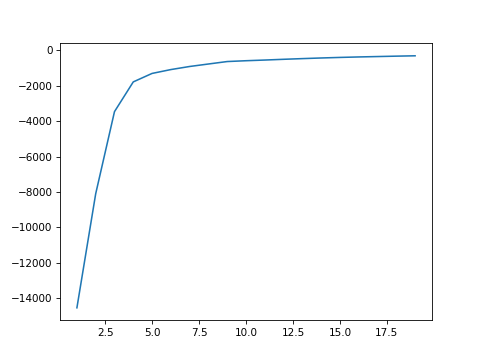

In [104]:
# calculer avec un nombre différent de centroïdes pour voir la courbe de perte (méthode du coude)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [105]:
# I choose 15 centroids arbitrarily and add these data to the central dataframe
df['cluster'] = kmeans[7].predict(data)
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
#df['cluster'].value_counts()

In [106]:
df

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,time_epoch,cluster,principal_feature1,principal_feature2
0,2013-07-04 00:00:00,21.044908,0,0,3,1,13728960,0,0.066191,1.755363
1,2013-07-04 01:00:00,21.789015,1,0,3,1,13728996,0,-0.009413,1.647609
2,2013-07-04 02:00:00,21.598781,2,0,3,1,13729032,0,-0.009359,1.577677
3,2013-07-04 03:00:00,20.533000,3,0,3,1,13729068,0,0.061592,1.543184
4,2013-07-04 04:00:00,20.713084,4,0,3,1,13729104,0,0.031660,1.458262
...,...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,22.427892,11,1,2,1,14012748,7,-0.663130,-0.218870
7263,2014-05-28 12:00:00,22.318309,12,1,2,1,14012784,7,-0.669607,-0.292067
7264,2014-05-28 13:00:00,22.248092,13,1,2,1,14012820,7,-0.679271,-0.366858
7265,2014-05-28 14:00:00,22.125126,14,1,2,1,14012856,7,-0.684664,-0.439514


<IPython.core.display.Javascript object>


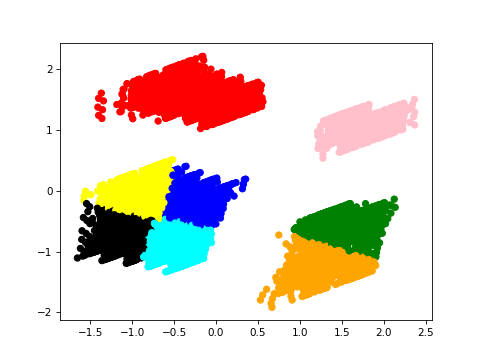

In [107]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()

In [108]:
# obtenir la distance entre chaque point et son centroïde le plus proche. Les plus grandes distances sont considérées comme une anomalie
distance = cf.getDistanceByPoint(data, kmeans[14])
# Une estimation de la population anormale de l'ensemble de données (nécessaire pour plusieurs algorithmes) 1%
outliers_fraction = 0.01
number_of_outliers = int(outliers_fraction*len(data)) #1% de la population maximum
threshold = distance.nlargest(number_of_outliers).min() #retourne la distance la plus petite parmis les n="number_of_outlier" plus grandes distances
# anomalie21 contient le résultat d'anomalie de la méthode 2.1 Cluster (0:normal, 1:anomalie) 
df['anomaly21'] = (distance >= threshold).astype(int)

C:\Users\MARIEM\OutlierDetection\FuntionUtils.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  distance.set_value(i, np.linalg.norm(Xa-Xb))


In [109]:
df[df['anomaly21'] ==1] 

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,time_epoch,cluster,principal_feature1,principal_feature2,anomaly21
1530,2013-09-09 01:00:00,20.329966,1,0,0,1,13786884,0,-0.629611,1.903379,1
1706,2013-09-23 00:00:00,21.783775,0,0,0,1,13798944,0,-0.731983,1.922164,1
1707,2013-09-23 01:00:00,21.156100,1,0,0,1,13798980,0,-0.696507,1.869938,1
1947,2013-10-07 00:00:00,24.874422,0,0,0,1,13811040,0,-0.982247,1.797061,1
1948,2013-10-07 01:00:00,24.579199,1,0,0,1,13811076,0,-0.973692,1.731378,1
...,...,...,...,...,...,...,...,...,...,...,...
4734,2014-02-03 01:00:00,21.819443,1,0,0,1,13913892,0,-0.750221,1.843088,1
4901,2014-02-10 00:00:00,22.253032,0,0,0,1,13919904,0,-0.769981,1.903170,1
4902,2014-02-10 01:00:00,21.491321,1,0,0,1,13919940,0,-0.723651,1.856369,1
5237,2014-02-24 00:00:00,21.895788,0,0,0,1,13932000,0,-0.741053,1.917630,1


<IPython.core.display.Javascript object>


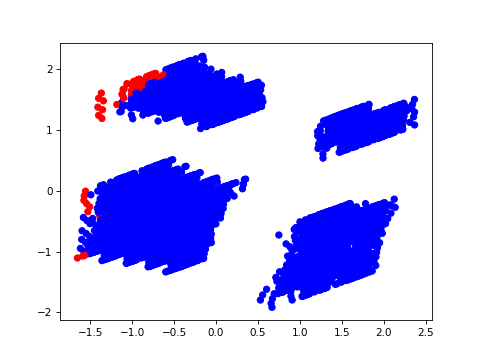

In [110]:
# visualisation de l'anomalie avec cluster view
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly21"].apply(lambda x: colors[x]))
plt.show()

<IPython.core.display.Javascript object>


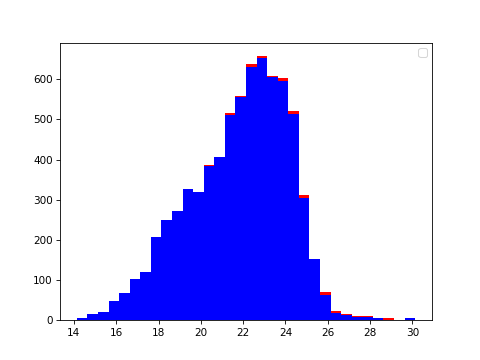

No handles with labels found to put in legend.


In [111]:
# visualisation de l'anomalie avec répartition de la température
a = df.loc[df['anomaly21'] == 0, 'value']
b = df.loc[df['anomaly21'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.legend()
plt.show()

In [112]:

from sklearn.cluster import DBSCAN
DB = DBSCAN(eps=0.1, min_samples=25)
DB.fit(data)

from collections import Counter
print(Counter(DB.labels_))

data[DB.labels_==-1]

Counter({1: 3676, 0: 1451, 3: 1325, 2: 559, -1: 256})


,0,1
734,1.441014,-1.528474
1359,1.493821,-1.502077
1361,-0.597572,1.989355
1527,1.421382,-1.538288
1704,1.324103,-1.586916
...,...,...
7138,0.197189,0.113832
7179,2.237648,1.437565
7180,2.262430,1.379993
7185,2.225203,1.011584


In [113]:
b = df[df['anomaly21']==1]

In [114]:
Anomaly=b.loc[:,['principal_feature1', 'principal_feature2']]

In [115]:
Anomaly

,principal_feature1,principal_feature2
1530,-0.629611,1.903379
1706,-0.731983,1.922164
1707,-0.696507,1.869938
1947,-0.982247,1.797061
1948,-0.973692,1.731378
...,...,...
4734,-0.750221,1.843088
4901,-0.769981,1.903170
4902,-0.723651,1.856369
5237,-0.741053,1.917630


In [116]:
l=data[DB.labels_==-1]

In [117]:
l.columns = ['principal_feature1', 'principal_feature2']

In [118]:
len(Anomaly)

72

In [119]:
intersected_df = pd.merge(l, Anomaly, how='inner')
print(intersected_df)

    principal_feature1  principal_feature2
0            -0.731983            1.922164
1            -0.982247            1.797061
2            -0.719119            1.928595
3            -0.761631            1.907344
4            -0.939333            1.818513
5            -1.060727            1.757830
6            -1.107206            1.664636
7            -1.119308            1.588627
8            -1.101584            1.527527
9            -1.366977            1.604741
10           -1.399413            1.518566
11           -1.341930            1.477341
12           -1.408353            1.374178
13           -1.353151            1.331812
14           -1.398868            1.238999
15           -1.359751            1.188593
16           -1.555384           -0.007857
17           -1.570510           -0.085378
18           -1.574665           -0.157414
19           -1.542765           -0.211428
20           -1.505507           -0.262763
21           -1.527304           -0.343619
22         